# EDA jigsaw-unintended-bias-in-toxicity-classification

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

<details>
  <summary>Dataset Description</summary>

  Disclaimer: The dataset contains text that may be considered profane, vulgar, or offensive.

  **Background**:
  - The dataset consists of ~2 million public comments from the Civil Comments platform, made available in an open archive for research purposes.
  - Jigsaw sponsored the effort and extended annotation of this data by human raters for various toxic conversational attributes.

  **Data Content**:
  - Each comment in the training set has a toxicity label (target)
  - The toxicity labels are fractional values representing the fraction of human raters who believed the attribute applied to the given comment.
  - Additional toxicity subtype attributes include severe_toxicity, obscene, threat, insult, identity_attack, and sexual_explicit. 
  - A subset of comments have been labeled with various identity attributes, representing the identities mentioned in the comment.

  **Examples**:
  - Comments have toxicity and identity mention labels ranging from 0.0 to 1.0, indicating the fraction of raters who believed the label fit the comment.

  **Labelling Schema**:
  - Toxicity labels were obtained by showing comments to up to 10 annotators, who rated the toxicity of each comment.
  - Identity labels were obtained by asking annotators to indicate all identities mentioned in the comment.

  **Annotators**:
  - Annotation was done in 2018 on the Figure Eight crowd rating platform, with raters compensated 1.5 cents per judgment.

  **File Descriptions**:
  - train.csv: The training set, including toxicity labels and subgroups.
  - test.csv: The test set, without toxicity labels or subgroups.
  - sample_submission.csv: A sample submission file in the correct format.

  **Additional Files**:
  - test_public_expanded.csv: The public leaderboard test set, including toxicity labels and subgroups.
  - test_private_expanded.csv: The private leaderboard test set, including toxicity labels and subgroups.
  - toxicity_individual_annotations.csv: Individual rater decisions for toxicity questions.
  - identity_individual_annotations.csv: Individual rater decisions for identity questions.

  **Usage**:
  - Released under CC0, including the underlying comment text.
</details>


## Data Dictionary
<details>
  <summary>Data Dictionary</summary>

| Column                              | Description                                                                 | Dtype  |
|-------------------------------------|-----------------------------------------------------------------------------|--------|
| id                                  | Unique identifier for each comment                                          | int64  |
| comment_text                        | Text content of the comment                                                  | object |
| split                               | Indicates the dataset split (e.g., train, test)                              | object |
| created_date                        | Date when the comment was created                                           | object |
| publication_id                      | Unique identifier for the publication                                       | int64  |
| parent_id                           | ID of the parent comment (if it is a reply)                                  | float64|
| article_id                          | ID of the article the comment is related to                                  | int64  |
| rating                              | Civility rating given by Civil Comments users                                | object |
| funny                               | Number of users who found the comment funny                                  | int64  |
| wow                                 | Number of users who reacted with "wow" to the comment                        | int64  |
| sad                                 | Number of users who reacted with sadness to the comment                      | int64  |
| likes                               | Number of users who liked the comment                                        | int64  |
| disagree                            | Number of users who disagreed with the comment                               | int64  |
| toxicity                            | Fraction of raters who rated the comment as toxic                            | float64|
| severe_toxicity                     | Fraction of raters who rated the comment as severely toxic                   | float64|
| obscene                             | Fraction of raters who rated the comment as obscene                           | float64|
| sexual_explicit                     | Fraction of raters who rated the comment as sexually explicit                | float64|
| identity_attack                     | Fraction of raters who rated the comment as an identity attack                | float64|
| insult                              | Fraction of raters who rated the comment as insulting                        | float64|
| threat                              | Fraction of raters who rated the comment as a threat                         | float64|
| male                                | Fraction of raters who identified the comment as mentioning male             | float64|
| female                              | Fraction of raters who identified the comment as mentioning female           | float64|
| transgender                         | Fraction of raters who identified the comment as mentioning transgender      | float64|
| other_gender                        | Fraction of raters who identified the comment as mentioning other genders    | float64|
| heterosexual                        | Fraction of raters who identified the comment as mentioning heterosexuals    | float64|
| homosexual_gay_or_lesbian           | Fraction of raters who identified the comment as mentioning homosexuals      | float64|
| bisexual                            | Fraction of raters who identified the comment as mentioning bisexuals        | float64|
| other_sexual_orientation            | Fraction of raters who identified the comment as mentioning other sexual orientations | float64|
| christian                           | Fraction of raters who identified the comment as mentioning Christians       | float64|
| jewish                              | Fraction of raters who identified the comment as mentioning Jews             | float64|
| muslim                              | Fraction of raters who identified the comment as mentioning Muslims          | float64|
| hindu                               | Fraction of raters who identified the comment as mentioning Hindus           | float64|
| buddhist                            | Fraction of raters who identified the comment as mentioning Buddhists        | float64|
| atheist                             | Fraction of raters who identified the comment as mentioning Atheists         | float64|
| other_religion                      | Fraction of raters who identified the comment as mentioning other religions  | float64|
| black                               | Fraction of raters who identified the comment as mentioning Black people     | float64|
| white                               | Fraction of raters who identified the comment as mentioning White people     | float64|
| asian                               | Fraction of raters who identified the comment as mentioning Asian people     | float64|
| latino                              | Fraction of raters who identified the comment as mentioning Latino people    | float64|
| other_race_or_ethnicity             | Fraction of raters who identified the comment as mentioning other races or ethnicities | float64|
| physical_disability                 | Fraction of raters who identified the comment as mentioning physical disabilities | float64|
| intellectual_or_learning_disability | Fraction of raters who identified the comment as mentioning intellectual or learning disabilities | float64|
| psychiatric_or_mental_illness       | Fraction of raters who identified the comment as mentioning psychiatric or mental illnesses | float64|
| other_disability                    | Fraction of raters who identified the comment as mentioning other disabilities | float64|
| identity_annotator_count            | Number of annotators who labeled the identities mentioned in the comment      | int64  |
| toxicity_annotator_count            | Number of annotators who rated the toxicity of the comment                    | int64  |
|parent_id_present(added) | Binary, indicates present of parent id, if 0 comment is not response to another comment | int64|
</details>


Data, organization/types:
The Data can be described and grouped into the following: 

1. **Text Comments**:
   - comment_text: Text content of the comment

2. **Identity Attributes**:
   - male, female, transgender, other_gender, heterosexual, homosexual_gay_or_lesbian, bisexual, other_sexual_orientation
   - christian, jewish, muslim, hindu, buddhist, atheist, other_religion
   - black, white, asian, latino, other_race_or_ethnicity
   - physical_disability, intellectual_or_learning_disability, psychiatric_or_mental_illness, other_disability

3. **Annotation Attributes**:
   - identity_annotator_count: Number of annotators who labeled the identities mentioned in the comment
   - toxicity_annotator_count: Number of annotators who rated the toxicity of the comment

4. **Metadata Attributes**:
   - id: Unique identifier for each comment
   - split: Indicates the dataset split (e.g., train, test)
   - created_date: Date when the comment was created
   - publication_id: Unique identifier for the publication
   - parent_id: ID of the parent comment (if it is a reply)
   - article_id: ID of the article the comment is related to
   - rating: Civility rating given by Civil Comments users
   - funny, wow, sad, likes, disagree: User reactions to the comment

5. **Toxicity Attributes**:
   - toxicity, severe_toxicity, obscene, sexual_explicit, identity_attack, insult, threat: Fraction of raters who rated the comment with
     these toxic attributes


**The EDA will follow these sections and assess data in terms of relationship to toxicity attributes.** 

## General EDA

In [2]:
df= pd.read_csv('../data/kaggle_bias/all_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999516 entries, 0 to 1999515
Data columns (total 46 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   comment_text                         object 
 2   split                                object 
 3   created_date                         object 
 4   publication_id                       int64  
 5   parent_id                            float64
 6   article_id                           int64  
 7   rating                               object 
 8   funny                                int64  
 9   wow                                  int64  
 10  sad                                  int64  
 11  likes                                int64  
 12  disagree                             int64  
 13  toxicity                             float64
 14  severe_toxicity                      float64
 15  obscene                         

In [4]:
df.head(2)

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76


In [5]:
df.shape

(1999516, 46)

In [6]:
df.isnull().sum()

id                                           0
comment_text                                 4
split                                        0
created_date                                 0
publication_id                               0
parent_id                               864807
article_id                                   0
rating                                       0
funny                                        0
wow                                          0
sad                                          0
likes                                        0
disagree                                     0
toxicity                                     0
severe_toxicity                              0
obscene                                      0
sexual_explicit                              0
identity_attack                              0
insult                                       0
threat                                       0
male                                   1551516
female       

### Deal with Nulls

**parent_id**

In [7]:
#parent id
df['parent_id'].value_counts()

parent_id
6044064.0    44
701929.0     39
654936.0     38
5547432.0    30
631450.0     26
             ..
5191761.0     1
1065022.0     1
689775.0      1
743906.0      1
807615.0      1
Name: count, Length: 786827, dtype: int64

In [8]:
tot_rows=len(df)
null_parent_id = df['parent_id'].isnull().sum()
percentage_nulls_parent_id = (null_parent_id / tot_rows) * 100
print(f"Percentage of nulls in parent_id column: {percentage_nulls_parent_id:.2f}%")

Percentage of nulls in parent_id column: 43.25%


In [9]:
is_zero_count = (df['parent_id'].value_counts() == 0).any()
if is_zero_count:
    print("Some parent_id values have a count of 0.")
else:
    print("All parent_id values have a count greater than 0.")

All parent_id values have a count greater than 0.


Since all parent_id values have a count greater than zero and a large percentage is null it is inferred that Null values correspond to the comment not being a response to a previous comment. To address this while keeping the original parent ids a new column will be created indicating parent_id present:1 or not present: 0

In [10]:
df['parent_id_present'] = df['parent_id'].notnull().astype(int)

In [11]:
df['parent_id_present'].value_counts()

parent_id_present
1    1134709
0     864807
Name: count, dtype: int64

**identities**

In [12]:
#percentage of identies that are null for each column
#the same amount values are null for all identies, calculate percentage of ea. col with one for example
null_identity = df['male'].isnull().sum()
percentage_null_identity_col = (null_identity/tot_rows)*100
print(f'Percentage of nulls in an Identity column: {percentage_null_identity_col:.2f}%')

Percentage of nulls in an Identity column: 77.59%


In [13]:
#convert created_date to datetime
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['date'] = df['created_date'].dt.date
df['created_date'].head()

0   2017-03-06 15:21:53.675241+00:00
1   2016-12-02 16:44:21.329535+00:00
2   2017-09-05 19:05:32.341360+00:00
3   2016-11-01 16:53:33.561631+00:00
4   2017-06-14 05:08:21.997315+00:00
Name: created_date, dtype: datetime64[ns, UTC]

In [14]:
#List of identity columns
identity_columns = ['male', 'female', 'transgender', 'other_gender', 'heterosexual', 
                    'homosexual_gay_or_lesbian', 'bisexual', 'other_sexual_orientation', 
                    'christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 
                    'other_religion', 'black', 'white', 'asian', 'latino', 
                    'other_race_or_ethnicity', 'physical_disability', 
                    'intellectual_or_learning_disability', 'psychiatric_or_mental_illness', 
                    'other_disability']

In [15]:
#check if any value in each row is True, use .any(axis=1)
null_identity_rows = df[df[identity_columns].isnull().any(axis=1)]

#extract unique dates from the filtered DataFrame
null_identity_dates = null_identity_rows['created_date'].dt.date.unique()

#Print the unique dates
#print(null_identity_dates)

null values are not from consistent dates as many dates are present. 

In [16]:
#number of samples where idenity contains 0 as val
zero_identity_count = (df[identity_columns].sum(axis=1) == 0).sum()

#Print the count
print(f"Number of rows where the value in the identity columns is 0: {zero_identity_count}")

Number of rows where the value in the identity columns is 0: 1749934


In [17]:
for col in identity_columns:
    #check if col is null when all other identity columns are null
    is_null = df[col].isnull()
    other_nulls = df[identity_columns].isnull().sum(axis=1) - is_null
    is_unique_null = is_null & (other_nulls == len(identity_columns) - 1)
    unique_null_count = is_unique_null.sum()
    print(f"Number of rows where {col} is null if all other identity columns are null: {unique_null_count}")

Number of rows where male is null if all other identity columns are null: 1551516
Number of rows where female is null if all other identity columns are null: 1551516
Number of rows where transgender is null if all other identity columns are null: 1551516
Number of rows where other_gender is null if all other identity columns are null: 1551516
Number of rows where heterosexual is null if all other identity columns are null: 1551516
Number of rows where homosexual_gay_or_lesbian is null if all other identity columns are null: 1551516
Number of rows where bisexual is null if all other identity columns are null: 1551516
Number of rows where other_sexual_orientation is null if all other identity columns are null: 1551516
Number of rows where christian is null if all other identity columns are null: 1551516
Number of rows where jewish is null if all other identity columns are null: 1551516
Number of rows where muslim is null if all other identity columns are null: 1551516
Number of rows wher

Appears that when an identity column is null all other identity columns are null in the same row. Based on this and because there are identity column values where fraction of annotars is 0, it can inferred that null in identity columns across a sample represent comments that were not viewd by annotators to identify identity. This means that if idenitity tags are to be used in analysis this leaves a 32.41% sample of the total data. A possible way to work with identity tags may be to create an identifier column as to if the comment was viewed by an annotator to identify identity or not. The analysis of identity tags may have to be a seperate analysis as a sample of the data would be taken and cannot be compared to overall data distributions, and is not necessarily a representation of the data. Perhaps a solution to the appearance of identities in comments labeled as toxic could be found in the way the model recognizes the text. 

In [18]:
#check occurence of toxicity attributes between samples that have idenity tags and columns that do not
#~ -> is not , .gt() -> greater than, use .any(axis=1) -> check for True in elements of row
identity_not_null_toxic = df[(~df[identity_columns].isnull().any(axis=1)) & (df[['toxicity', 'severe_toxicity', 'obscene',
                                                                                  'sexual_explicit', 'identity_attack', 'insult',
                                                                                  'threat']].gt(0).any(axis=1))]
identity_null_toxic = df[(df[identity_columns].isnull().any(axis=1)) & (df[['toxicity', 'severe_toxicity', 'obscene',
                                                                                  'sexual_explicit', 'identity_attack', 'insult',
                                                                                  'threat']].gt(0).any(axis=1))]
print("identity tags present, toxicity and attribues present:")
print(identity_not_null_toxic)
print("identity tags not present, toxicity and attributes present:")
print(identity_null_toxic)

identity tags present, toxicity and attribues present:
              id                                       comment_text  split  \
7678      627762  OH yes - Were those evil Christian Missionarie...  train   
7679     5892815  Why is this black racist crap still on the G&M...  train   
7680      416437                         even up here.......BLACKS!  train   
7681     5137126  Blame men.  There's always an excuse to blame ...  train   
7682      855753  And the woman exposing herself saying grab thi...  train   
...          ...                                                ...    ...   
1999511  1018736  Another man shamming article. If white men did...  train   
1999512   340016  "no matter what is put in front of you regardi...  train   
1999513   919629  The Democrat party aided and abetted by it's M...  train   
1999514  5165492  I just don't find her a very good representati...  train   
1999515  4984105  You know the Trump fanatics are trolling the G...  train   

        

In [20]:
tot_ident_notnull_toxic_samples = len(identity_not_null_toxic)
tot_ident_null_toxic_samples = len(identity_null_toxic)

print("Total number of samples where at least one toxicity attribute is greater than 0:")
print("Identity columns not null:", tot_ident_notnull_toxic_samples)
print("Identity columns null:", tot_ident_null_toxic_samples)

Total number of samples where at least one toxicity attribute is greater than 0:
Identity columns not null: 183603
Identity columns null: 438770


In [24]:
#Percentages of respective samples; subset with identity tags, subset without, that have toxicity attributes
#calculate the total number of samples where at least one toxicity attribute is greater than 0 for each condition
#filter the df
tot_ident_null_toxic_samples = len(identity_null_toxic[identity_null_toxic[['toxicity', 'severe_toxicity', 
                                                                            'obscene', 'sexual_explicit', 'identity_attack',
                                                                            'insult', 'threat']].gt(0).any(axis=1)])
tot_ident_notnull_toxic_samples = len(identity_not_null_toxic[identity_not_null_toxic[['toxicity', 'severe_toxicity', 
                                                                                       'obscene', 'sexual_explicit', 
                                                                                       'identity_attack', 'insult', 
                                                                                       'threat']].gt(0).any(axis=1)])

#calculate the percentage of samples labeled with toxic attribute out of data with no identity tags and subset of data with identity tags
per_null_ident_sample_toxic = (tot_ident_null_toxic_samples / len(null_identity_rows)) * 100
per_nonnull_ident_sample_toxic = (tot_ident_notnull_toxic_samples / (len(df) - len(null_identity_rows))) * 100

print(f'Percent labeled with toxic attribute out of data with no identity tags:{per_null_ident_sample_toxic:.2f} %')
print(f'Percent labeled with toxic attribute out of subset of data with identity tags:{per_nonnull_ident_sample_toxic:.2}%')

Percent labeled with toxic attribute out of data with no identity tags:28.28 %
Percent labeled with toxic attribute out of subset of data with identity tags:4.1e+01%


It seems that the percentage of data labeled with a toxic attribute is higher in the subset of data where there are no identity tags compared to the subset where there are identity tags present. In each subset of the data there is a high class imbalance. 

**comment_text**

In [31]:
df['comment_text'].isnull().sum()

4

In [32]:
#drop 4 rows where comment text is null
df =df.dropna(subset=['comment_text'])

## Toxic Attributes

In [36]:
df['toxicity'].head(2)

0    0.373134
1    0.605263
Name: toxicity, dtype: float64

In [61]:
toxicity_columns = ['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult', 'threat']

In [39]:
#check that if toxicity attribute is present, toxcity for sample >0 , .gt(0) -> greater than zero
toxicity_zero_check = df[(df[['severe_toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 
                              'insult', 'threat']].gt(0).any(axis=1)) & (df['toxicity'] == 0)]
toxicity_zero_attribute_count = len(toxicity_zero_check)
#display the rows where at least one toxic attribute is present but toxicity is 0
print(toxicity_zero_attribute_count)

24619


Appears that toxicity attributes are not necissarily a subset of toxicity, as there are samples where values in toxicity attribute columns are greater than 0 and toxicity is 0. 

For distributions of toxic attribues see notebook: EDA_data_bias_Arman

In [42]:
def calculate_toxicity_proportions(df):
    """
    Calculate the proportions of data labeled with each toxic attribute.
    Args:
    - df: DataFrame containing the toxic attribute columns

    Returns:
    - proportions: Dictionary containing the proportions for each toxic attribute
    """
    proportions = {}
    toxic_attributes = ['toxicity', 'severe_toxicity', 'obscene',
                        'sexual_explicit', 'identity_attack',
                        'insult', 'threat']

    for attribute in toxic_attributes:
        proportion = df[attribute].gt(0).mean() * 100
        proportions[attribute] = proportion

    return proportions

In [43]:
toxicity_proportions = calculate_toxicity_proportions(df)

for attribute, proportion in toxicity_proportions.items():
    print(f"Proportion of data labeled with {attribute}: {proportion:.2f}%")

Proportion of data labeled with toxicity: 29.89%
Proportion of data labeled with severe_toxicity: 5.79%
Proportion of data labeled with obscene: 8.15%
Proportion of data labeled with sexual_explicit: 3.81%
Proportion of data labeled with identity_attack: 12.08%
Proportion of data labeled with insult: 25.17%
Proportion of data labeled with threat: 5.91%


In [45]:
df[['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
                     'identity_attack', 'insult', 'threat']].describe()

,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat
count,1.999512e+06,1.999512e+06,1.999512e+06,1.999512e+06,1.999512e+06,1.999512e+06,1.999512e+06
mean,1.029243e-01,4.580572e-03,1.389048e-02,6.562444e-03,2.254904e-02,8.113811e-02,9.280951e-03
std,1.970388e-01,2.285762e-02,6.466382e-02,4.511181e-02,7.854030e-02,1.760994e-01,4.933788e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.474576e-02,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


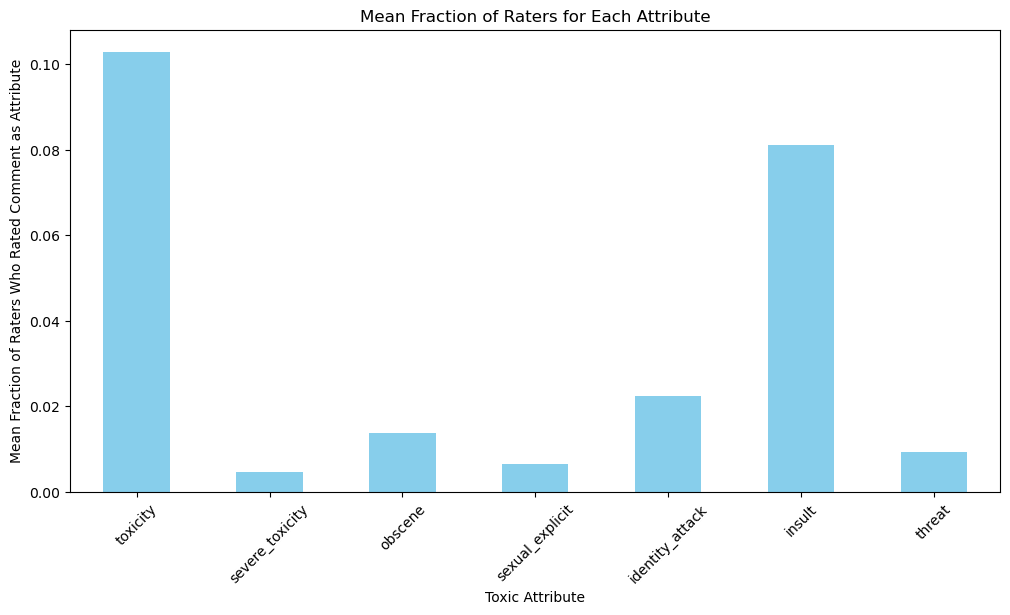

In [48]:
#calculate and plot the means of ea. toxicity attribute (including toxicity)
mean_toxicity = df[['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
                     'identity_attack', 'insult', 'threat']].mean()

plt.figure(figsize=(12, 6))
mean_toxicity.plot(kind='bar', color='skyblue')
plt.xlabel('Toxic Attribute')
plt.ylabel('Mean Fraction of Raters Who Rated Comment as Attribute')
plt.title('Mean Fraction of Raters for Each Attribute')
plt.xticks(rotation=45)
plt.show()

In [50]:
#total percentage of data where at least one  toxic attribute had a fraction of raters > 0
total_samples = len(df)
toxic_samples = len(df[df[['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
                           'identity_attack', 'insult', 'threat']].gt(0).any(axis=1)])
percentage_toxic = (toxic_samples / total_samples) * 100
print(f"Total percentage of data where at least one toxic attribute is greater than 0: {percentage_toxic:.2f}%")

Total percentage of data where at least one toxic attribute is greater than 0: 31.13%


See corr heatmap(in annotations), for correlations of toxic attribues with each other, as well as toxicity annotator count

In [62]:
#calculate Pearson's r and p-value for each pair of columns
for i in range(len(toxicity_columns)):
    for j in range(i+1, len(toxicity_columns)):
        col1 = toxicity_columns[i]
        col2 = toxicity_columns[j]
        r, p_value = pearsonr(df[col1], df[col2])
        print(f"Correlation between '{col1}' and '{col2}':")
        print(f"Pearson's r: {r}, p-value: {p_value}")
        if p_value < 0.05:
            print("The correlation is statistically significant.\n")
        else:
            print("The correlation is not statistically significant.\n")

Correlation between 'toxicity' and 'severe_toxicity':
Pearson's r: 0.3935726036625576, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity' and 'obscene':
Pearson's r: 0.493171775659351, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity' and 'sexual_explicit':
Pearson's r: 0.2520597211982859, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity' and 'identity_attack':
Pearson's r: 0.44950536697034205, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity' and 'insult':
Pearson's r: 0.9284040387755025, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity' and 'threat':
Pearson's r: 0.2873923735427403, p-value: 0.0
The correlation is statistically significant.

Correlation between 'severe_toxicity' and 'obscene':
Pearson's r: 0.3411826923897801, p-value: 0.0
The correlation is statistically significant.

It would be expected that there are correlations between toxicity attributes, and it is validated that these correlations are statistically significant. 

## Text Comments

In [30]:
df['comment_text'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1999516 entries, 0 to 1999515
Series name: comment_text
Non-Null Count    Dtype 
--------------    ----- 
1999512 non-null  object
dtypes: object(1)
memory usage: 15.3+ MB


In [33]:
#look at distribution of text length
df['text_length'] =df['comment_text'].apply(len)

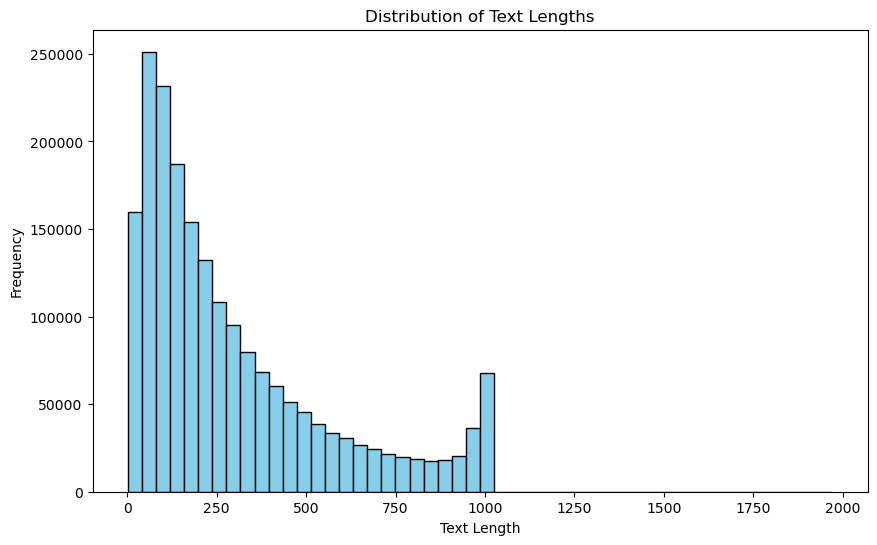

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

Further EDA of Text comments in relation to toxicity that can be done: 
- text length corr with toxicity
- word count distribution
- common words analysis
- n-grams
- sentiment analysis
- topic modelling
- text preprocessing

This will be revisited if it is decided to use this dataset for Machine learning in identifying toxicity. 

## Identity and Toxicity

EDA can be done on subset of identity data in relation to toxicity: 
- Distribution of Identity labels (fractions of annotators that identified comment as containing identity label)
- Counts of Indentity labels in subset
- Identity and relationship to toxicity attributes, investigate whether comments that conatin specific identity attributes are more likely to be labeled as toxic compared to comments without attributes. 
- Intersectionality of identies and association with toxicity (Co-occurence and toxicity)
- Toxicity attributes distribution by identity
  

## Annotation


From documentation: "To obtain the toxicity labels, each comment was shown to up to 10 annotators*. Annotators were asked to: "Rate the toxicity of this comment"

In [52]:
df[['identity_annotator_count','toxicity_annotator_count']].describe()

,identity_annotator_count,toxicity_annotator_count
count,1.999512e+06,1.999512e+06
mean,1.431666e+00,8.775729e+00
std,1.763595e+01,4.331609e+01
min,0.000000e+00,3.000000e+00
25%,0.000000e+00,4.000000e+00
50%,0.000000e+00,4.000000e+00
75%,0.000000e+00,6.000000e+00
max,1.866000e+03,4.936000e+03


In looking at some examples of values in column down below and descriptive stats of annotator count columns, it seems that there are possibly outliers or errors in the data. 

In [54]:
df['toxicity_annotator_count']

0          67
1          76
2          63
3          76
4          80
           ..
1999511    10
1999512    10
1999513    10
1999514    10
1999515    10
Name: toxicity_annotator_count, Length: 1999512, dtype: int64

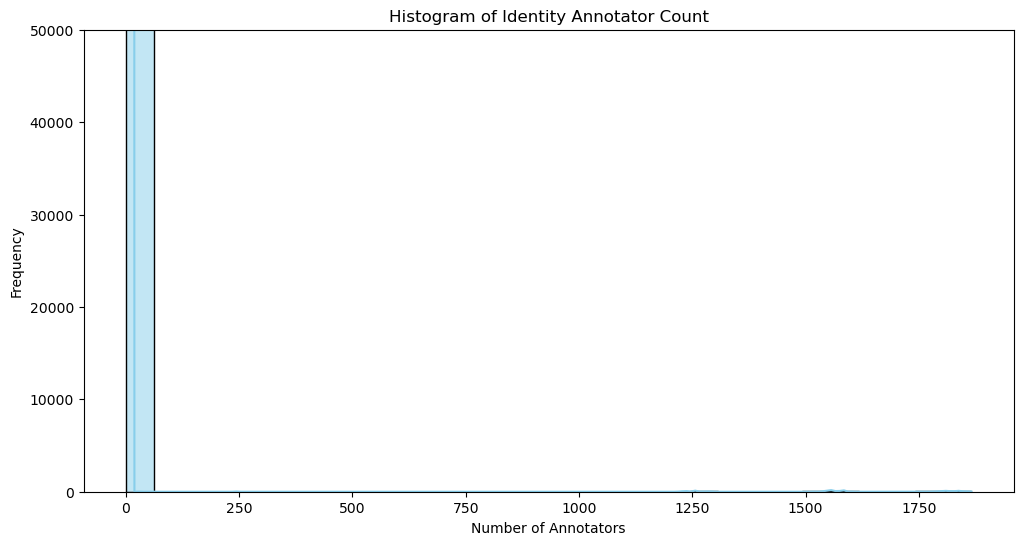

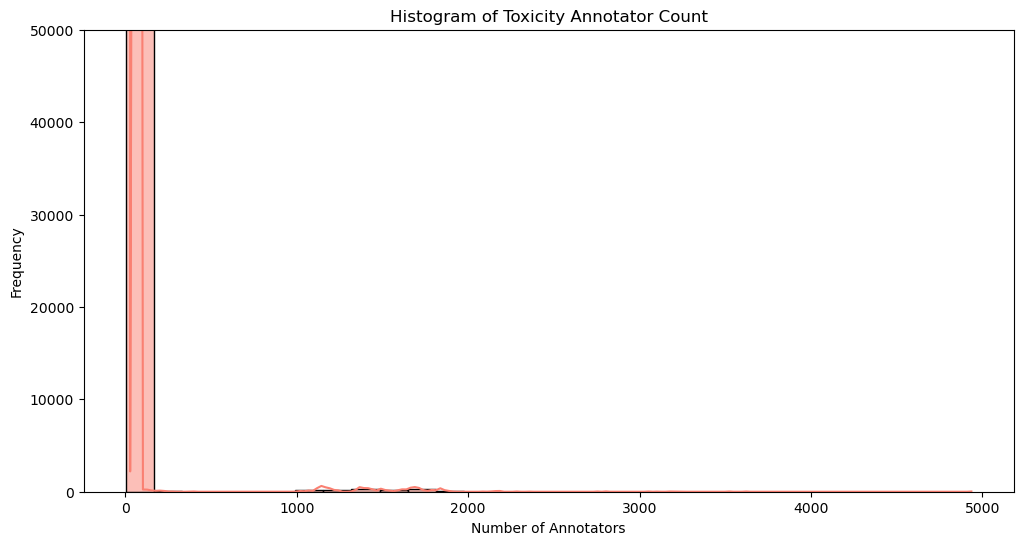

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='identity_annotator_count', bins=30, color='skyblue', kde=True)
plt.title('Histogram of Identity Annotator Count')
plt.xlabel('Number of Annotators')
plt.ylabel('Frequency')
plt.ylim(0, 50000)  # Adjust the y-axis limits as needed
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='toxicity_annotator_count', bins=30, color='salmon', kde=True)
plt.title('Histogram of Toxicity Annotator Count')
plt.xlabel('Number of Annotators')
plt.ylabel('Frequency')
plt.ylim(0, 50000)  # Adjust the y-axis limits as needed
plt.show()

In looking at histograms of Annotator count columns and the descriptive statistics it seems that a large portion of annotator counts for both Toxicity and Identity have a value of 0 or close to 0. There is a discrepency in the max and min values seen in the descriptive statistics, this suggests possible outliers and or errors in the data. This may be further looked into if it is decided to use dataset. 

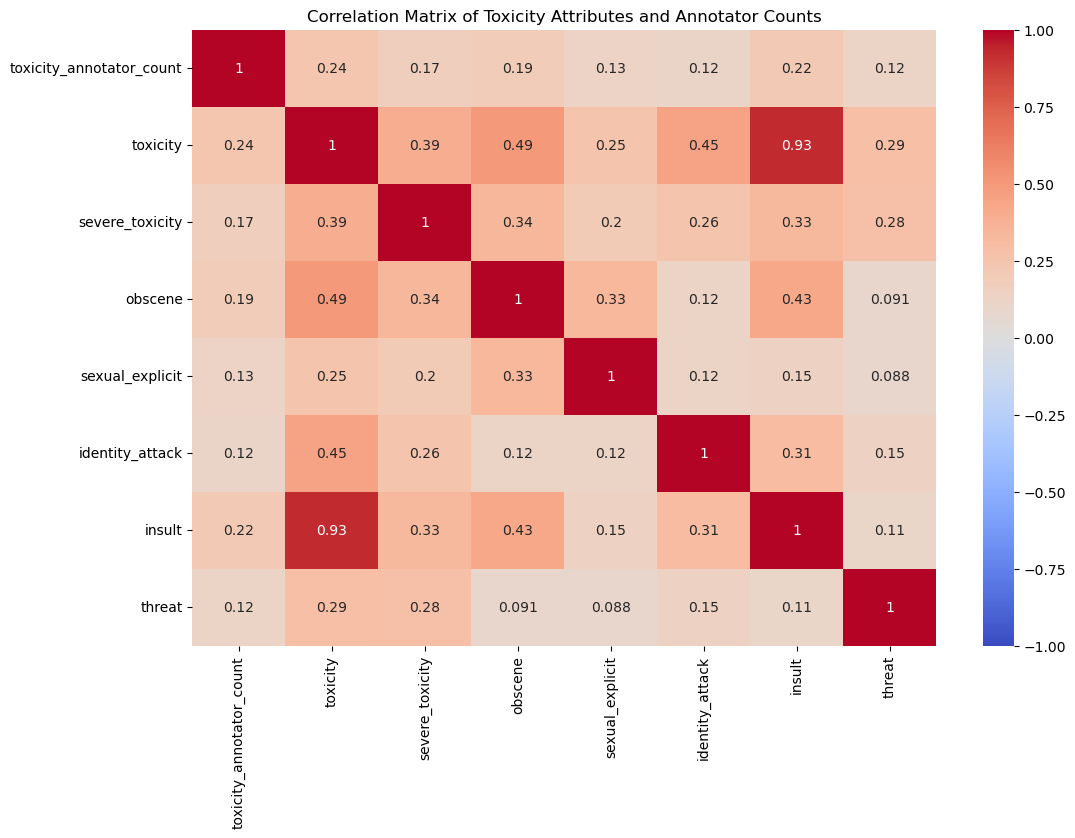

In [57]:
#correlation matrix
correlation_matrix = df[['toxicity_annotator_count', 'toxicity', 'severe_toxicity', 
                         'obscene', 'sexual_explicit', 'identity_attack', 
                         'insult', 'threat']].corr()

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Toxicity Attributes and Annotator Counts')
plt.show()

In [59]:
#pearson r corr with annotator count and toxicity attributes
#cols for pearson r
columns = ['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit', 'identity_attack', 'insult', 'threat']

#pearson's r and p-value for each column
for column in columns:
    r, p_value = pearsonr(df['toxicity_annotator_count'], df[column])
    print(f"Correlation between 'toxicity_annotator_count' and '{column}':")
    print(f"Pearson's r: {r}, p-value: {p_value}")
    if p_value < 0.05:
        print("The correlation is statistically significant.\n")
    else:
        print("The correlation is not statistically significant.\n")

Correlation between 'toxicity_annotator_count' and 'toxicity':
Pearson's r: 0.23794408129768727, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity_annotator_count' and 'severe_toxicity':
Pearson's r: 0.16748107418706998, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity_annotator_count' and 'obscene':
Pearson's r: 0.19202918130537822, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity_annotator_count' and 'sexual_explicit':
Pearson's r: 0.1270810932232513, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity_annotator_count' and 'identity_attack':
Pearson's r: 0.11530413656081619, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity_annotator_count' and 'insult':
Pearson's r: 0.21592514078803898, p-value: 0.0
The correlation is statistically significant.

Correlation between 'toxicity_annotator_c

Insult has the greatest correlation with toxicity. In looking at annotator toxicity counts correlations the greatest correlations are with toxicty and insult. This does not imply causation but there is an association with higher annotator counts and higher fractionts of annotators labeling insult and toxic. In general annotator counts show a positive statistically significant correlation with toxicity attributes. This may also be due to annotator counts being right skewed. 

- Annotator counts for identity could also be analyzed with a corr heatmap, with identity attributes.

## Meta Data

### Toxicity and Publication ID, Article ID, Parent ID

In [71]:
df['parent_id'].value_counts()    

parent_id
6044064.0    44
701929.0     39
654936.0     38
5547432.0    30
364601.0     26
             ..
1065022.0     1
689775.0      1
743906.0      1
763371.0      1
807615.0      1
Name: count, Length: 786826, dtype: int64

In [68]:
unique_publications = df['publication_id'].nunique()
unique_articles = df['article_id'].nunique()

print("Number of unique values in publication_id:", unique_publications)
print("Number of unique values in article_id:", unique_articles)

Number of unique values in publication_id: 53
Number of unique values in article_id: 116943


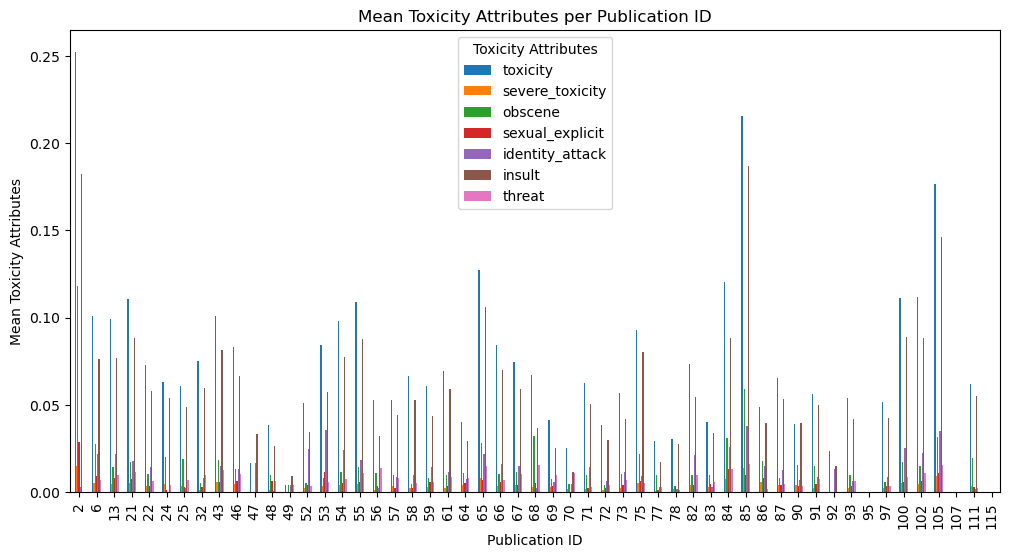

In [75]:
# Plot for publication_id
plt.figure(figsize=(12, 6))
df.groupby('publication_id')[['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit', 
                              'identity_attack', 'insult', 'threat']].mean().plot(kind='bar', ax=plt.gca())
plt.xlabel('Publication ID')
plt.ylabel('Mean Toxicity Attributes')
plt.title('Mean Toxicity Attributes per Publication ID')
plt.legend(title='Toxicity Attributes')
plt.show()



It does appear that some publications show higher mean toxicity values overall. 
Note: This graph is a little unlcear and could be done with plotly. 

### Toxicity and Rating

In [79]:
df['rating']

0          approved
1          approved
2          approved
3          approved
4          approved
             ...   
1999511    approved
1999512    approved
1999513    rejected
1999514    approved
1999515    approved
Name: rating, Length: 1999512, dtype: object

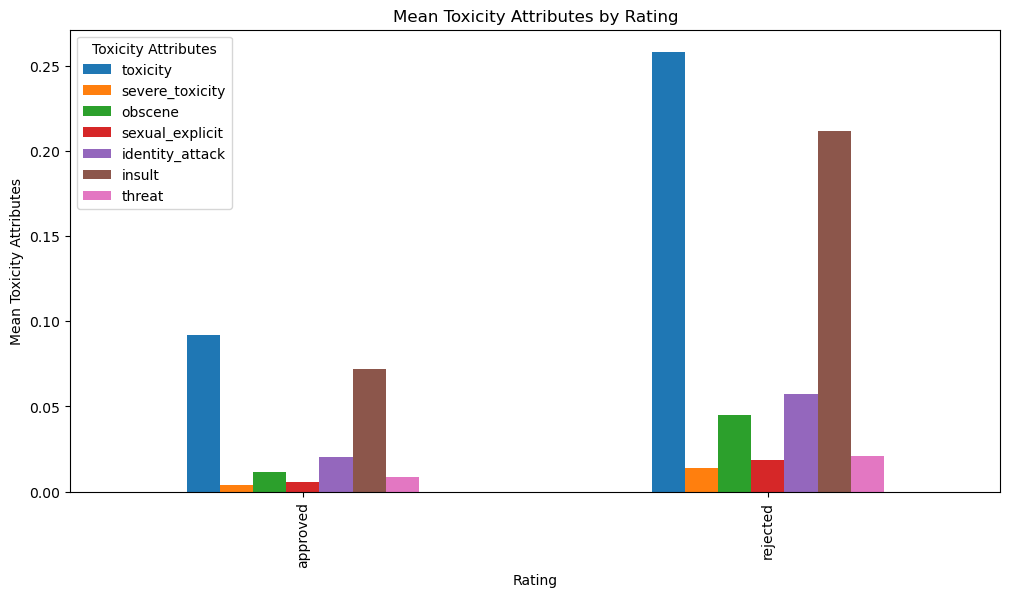

In [80]:
rating_mean = df.groupby('rating')[['toxicity', 'severe_toxicity', 'obscene', 'sexual_explicit',
                                    'identity_attack', 'insult', 'threat']].mean()

# Plot the mean values
plt.figure(figsize=(12, 6))
rating_mean.plot(kind='bar', ax=plt.gca())
plt.xlabel('Rating')
plt.ylabel('Mean Toxicity Attributes')
plt.title('Mean Toxicity Attributes by Rating')
plt.legend(title='Toxicity Attributes')
plt.show()

### Toxicity and User Reactions

In [90]:
df[['funny','wow','sad', 'likes', 'disagree']].head()

,funny,wow,sad,likes,disagree
0,0,0,0,2,0
1,0,0,1,2,0
2,1,0,2,3,7
3,0,0,0,0,0
4,0,0,0,1,0


In [92]:
df[['funny','wow','sad', 'likes', 'disagree']].describe()

,funny,wow,sad,likes,disagree
count,1.999512e+06,1.999512e+06,1.999512e+06,1.999512e+06,1.999512e+06
mean,2.776668e-01,4.437183e-02,1.089291e-01,2.441188e+00,5.808157e-01
std,1.054815e+00,2.458646e-01,4.555575e-01,4.712996e+00,1.854333e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
max,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02


May need to assess distributions and why min and max is close to zero. 

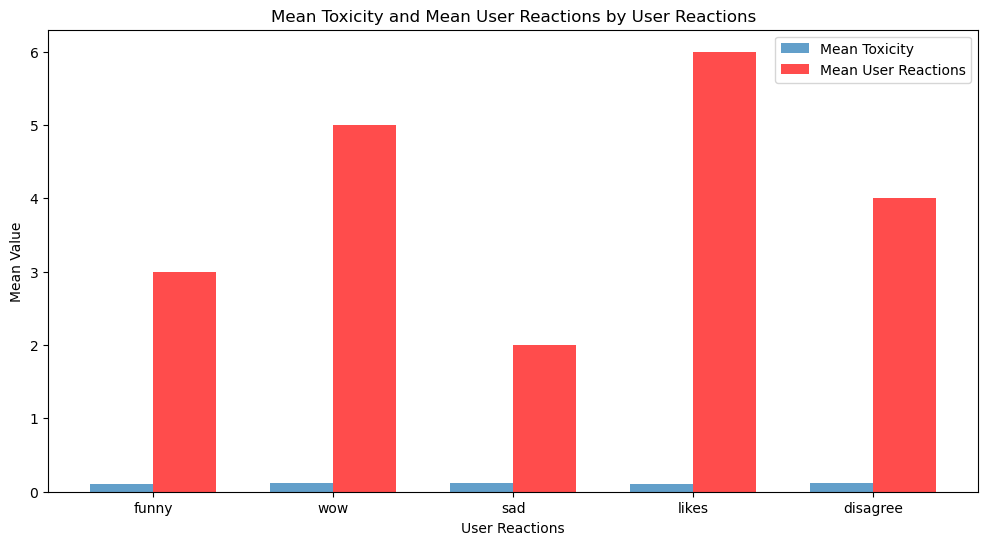

In [98]:
# Calculate mean toxicity for each user reaction
mean_toxicity_funny = df[df['funny'] > 0]['toxicity'].mean()
mean_toxicity_wow = df[df['wow'] > 0]['toxicity'].mean()
mean_toxicity_sad = df[df['sad'] > 0]['toxicity'].mean()
mean_toxicity_likes = df[df['likes'] > 0]['toxicity'].mean()
mean_toxicity_disagree = df[df['disagree'] > 0]['toxicity'].mean()

# Define the mean toxicity values as a list
mean_toxicity = [mean_toxicity_funny, mean_toxicity_wow, mean_toxicity_sad, mean_toxicity_likes, mean_toxicity_disagree]

# Sample data for mean user reactions (replace with your actual data)
mean_user_reactions = [3, 5, 2, 6, 4]

bar_width = 0.35
index = np.arange(len(mean_toxicity))

plt.figure(figsize=(12, 6))
plt.bar(index, mean_toxicity, width=bar_width, alpha=0.7, label='Mean Toxicity')
plt.bar(index + bar_width, mean_user_reactions, width=bar_width, color='red', alpha=0.7, label='Mean User Reactions')
plt.xlabel('User Reactions')
plt.ylabel('Mean Value')
plt.title('Mean Toxicity and Mean User Reactions by User Reactions')
plt.xticks(index + bar_width / 2, ['funny', 'wow', 'sad', 'likes', 'disagree'])
plt.legend()
plt.show()
